# Crawl Data

In [121]:
# From engine import the DataCrawler class
from webengine import DataCrawler
from apiengine import WorldBankData
import warnings
warnings.filterwarnings('ignore')

In [122]:
# # Initialize the DataCrawler object 
# webcrawler = DataCrawler()
# # Call the crawl_data method to start the crawling process
# webcrawler.crawl_data()
# result_df = webcrawler.get_final_dataframe()
# webcrawler.close_driver()
# result_df.to_excel("population_data.xlsx", index=False)

In [123]:
# # WorldBank API Crawler
# apicrawler = WorldBankData()
# gdp_dataset, unemployment_dataset, combined_dataset = apicrawler.create_datasets()
# gdp_dataset.to_excel("gdp_data.xlsx", index=False)
# unemployment_dataset.to_excel("unemployment_data.xlsx", index=False)
# combined_dataset.to_excel("combined_data.xlsx", index=False)

# EDA

## Exploration

In [124]:
import pandas as pd
# Read the excel file that contains crawl data
df = pd.read_excel("population_data.xlsx")
gpd_df = pd.read_excel("gdp_data.xlsx")
unemployment_df = pd.read_excel("unemployment_data.xlsx")
combined_df = pd.read_excel("combined_data.xlsx")
df.head()

,Năm,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,country,Tuổi trung bình,Tỷ lệ sinh,Mật độ
0,2019,62506,-0.40,-250,1250,97.3,60833,0.0,7.713468e+09,206.0,Dân số Bermuda,NaN,NaN,NaN
1,2018,62756,-0.46,-293,1255,97.3,61070,0.0,7.631091e+09,206.0,Dân số Bermuda,NaN,NaN,NaN
2,2017,63049,-0.49,-313,1261,97.3,61349,0.0,7.547859e+09,206.0,Dân số Bermuda,NaN,NaN,NaN
3,2016,63362,-0.52,-330,1267,97.3,61666,0.0,7.464022e+09,205.0,Dân số Bermuda,NaN,NaN,NaN
4,2015,63692,-0.52,-339,1274,97.3,62003,0.0,7.379797e+09,205.0,Dân số Bermuda,NaN,NaN,NaN


In [125]:
# Split the Country columns and change name
df['Quốc Gia'] = df['country'].str.split('Dân số ').str[1]
# After split, drop the columns country
df.drop(columns=['country'], inplace=True)
df.head()


,Năm,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ,Quốc Gia
0,2019,62506,-0.40,-250,1250,97.3,60833,0.0,7.713468e+09,206.0,NaN,NaN,NaN,Bermuda
1,2018,62756,-0.46,-293,1255,97.3,61070,0.0,7.631091e+09,206.0,NaN,NaN,NaN,Bermuda
2,2017,63049,-0.49,-313,1261,97.3,61349,0.0,7.547859e+09,206.0,NaN,NaN,NaN,Bermuda
3,2016,63362,-0.52,-330,1267,97.3,61666,0.0,7.464022e+09,205.0,NaN,NaN,NaN,Bermuda
4,2015,63692,-0.52,-339,1274,97.3,62003,0.0,7.379797e+09,205.0,NaN,NaN,NaN,Bermuda


In [126]:
# Describe the data, check the data type, check the missing value
display(df.describe(include='all'))
display(df.info())
display(df.isnull().sum())

,Năm,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ,Quốc Gia
count,3963.000000,3.963000e+03,3963.000000,3.963000e+03,3.963000e+03,3963,3963,3912.000000,3.912000e+03,3912.000000,3555.000000,3555.000000,3555.000000,3963
unique,NaN,NaN,NaN,NaN,NaN,1037,3802,NaN,NaN,NaN,NaN,NaN,NaN,222
top,NaN,NaN,NaN,NaN,NaN,N.A.,N.A.,NaN,NaN,NaN,NaN,NaN,NaN,Venezuela
freq,NaN,NaN,NaN,NaN,NaN,85,85,NaN,NaN,NaN,NaN,NaN,NaN,18
mean,1993.953066,2.573741e+07,1.699220,3.466122e+05,1.667497e+02,NaN,NaN,0.458252,5.678367e+09,111.193507,25.690098,196.615966,242.997468,NaN
std,21.686999,1.096422e+08,1.598464,1.369591e+06,1.013481e+05,NaN,NaN,1.867782,1.733109e+09,65.129760,8.804210,2567.467994,1218.077406,NaN
min,1955.000000,1.850000e+03,-12.930000,-6.730240e+05,-1.077397e+06,NaN,NaN,0.000000,2.758315e+09,1.000000,14.400000,0.850000,0.000000,NaN
25%,1975.000000,3.959265e+05,0.660000,1.985000e+03,-1.000000e+04,NaN,NaN,0.010000,4.079481e+09,55.000000,18.500000,2.110000,18.000000,NaN
50%,1995.000000,4.257505e+06,1.580000,4.616800e+04,-1.620000e+02,NaN,NaN,0.080000,5.744213e+09,109.500000,22.700000,3.550000,63.000000,NaN
75%,2016.000000,1.470937e+07,2.630000,2.276185e+05,3.373500e+03,NaN,NaN,0.270000,7.464022e+09,166.000000,31.600000,5.880000,142.000000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Năm              3963 non-null   int64  
 1   Dân số           3963 non-null   int64  
 2   % thay đổi       3963 non-null   float64
 3   Thay đổi         3963 non-null   int64  
 4   Di cư            3963 non-null   int64  
 5   % dân thành thị  3963 non-null   object 
 6   Dân thành thị    3963 non-null   object 
 7   % thế giới       3912 non-null   float64
 8   Thế giới         3912 non-null   float64
 9   Hạng             3912 non-null   float64
 10  Tuổi trung bình  3555 non-null   float64
 11  Tỷ lệ sinh       3555 non-null   float64
 12  Mật độ           3555 non-null   float64
 13  Quốc Gia         3963 non-null   object 
dtypes: float64(7), int64(4), object(3)
memory usage: 433.6+ KB


None

Năm                  0
Dân số               0
% thay đổi           0
Thay đổi             0
Di cư                0
% dân thành thị      0
Dân thành thị        0
% thế giới          51
Thế giới            51
Hạng                51
Tuổi trung bình    408
Tỷ lệ sinh         408
Mật độ             408
Quốc Gia             0
dtype: int64

- % thế giới     
- Thế giới           
- Hạng                
- Tuổi trung bình    
- Tỷ lệ sinh         
- Mật độ             

**These columns got Missing values**

In [127]:
df.fillna(0, inplace=True)
df.head()

,Năm,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ,Quốc Gia
0,2019,62506,-0.40,-250,1250,97.3,60833,0.0,7.713468e+09,206.0,0.0,0.0,0.0,Bermuda
1,2018,62756,-0.46,-293,1255,97.3,61070,0.0,7.631091e+09,206.0,0.0,0.0,0.0,Bermuda
2,2017,63049,-0.49,-313,1261,97.3,61349,0.0,7.547859e+09,206.0,0.0,0.0,0.0,Bermuda
3,2016,63362,-0.52,-330,1267,97.3,61666,0.0,7.464022e+09,205.0,0.0,0.0,0.0,Bermuda
4,2015,63692,-0.52,-339,1274,97.3,62003,0.0,7.379797e+09,205.0,0.0,0.0,0.0,Bermuda


## Data Analysis

### Countries Population and World Population

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

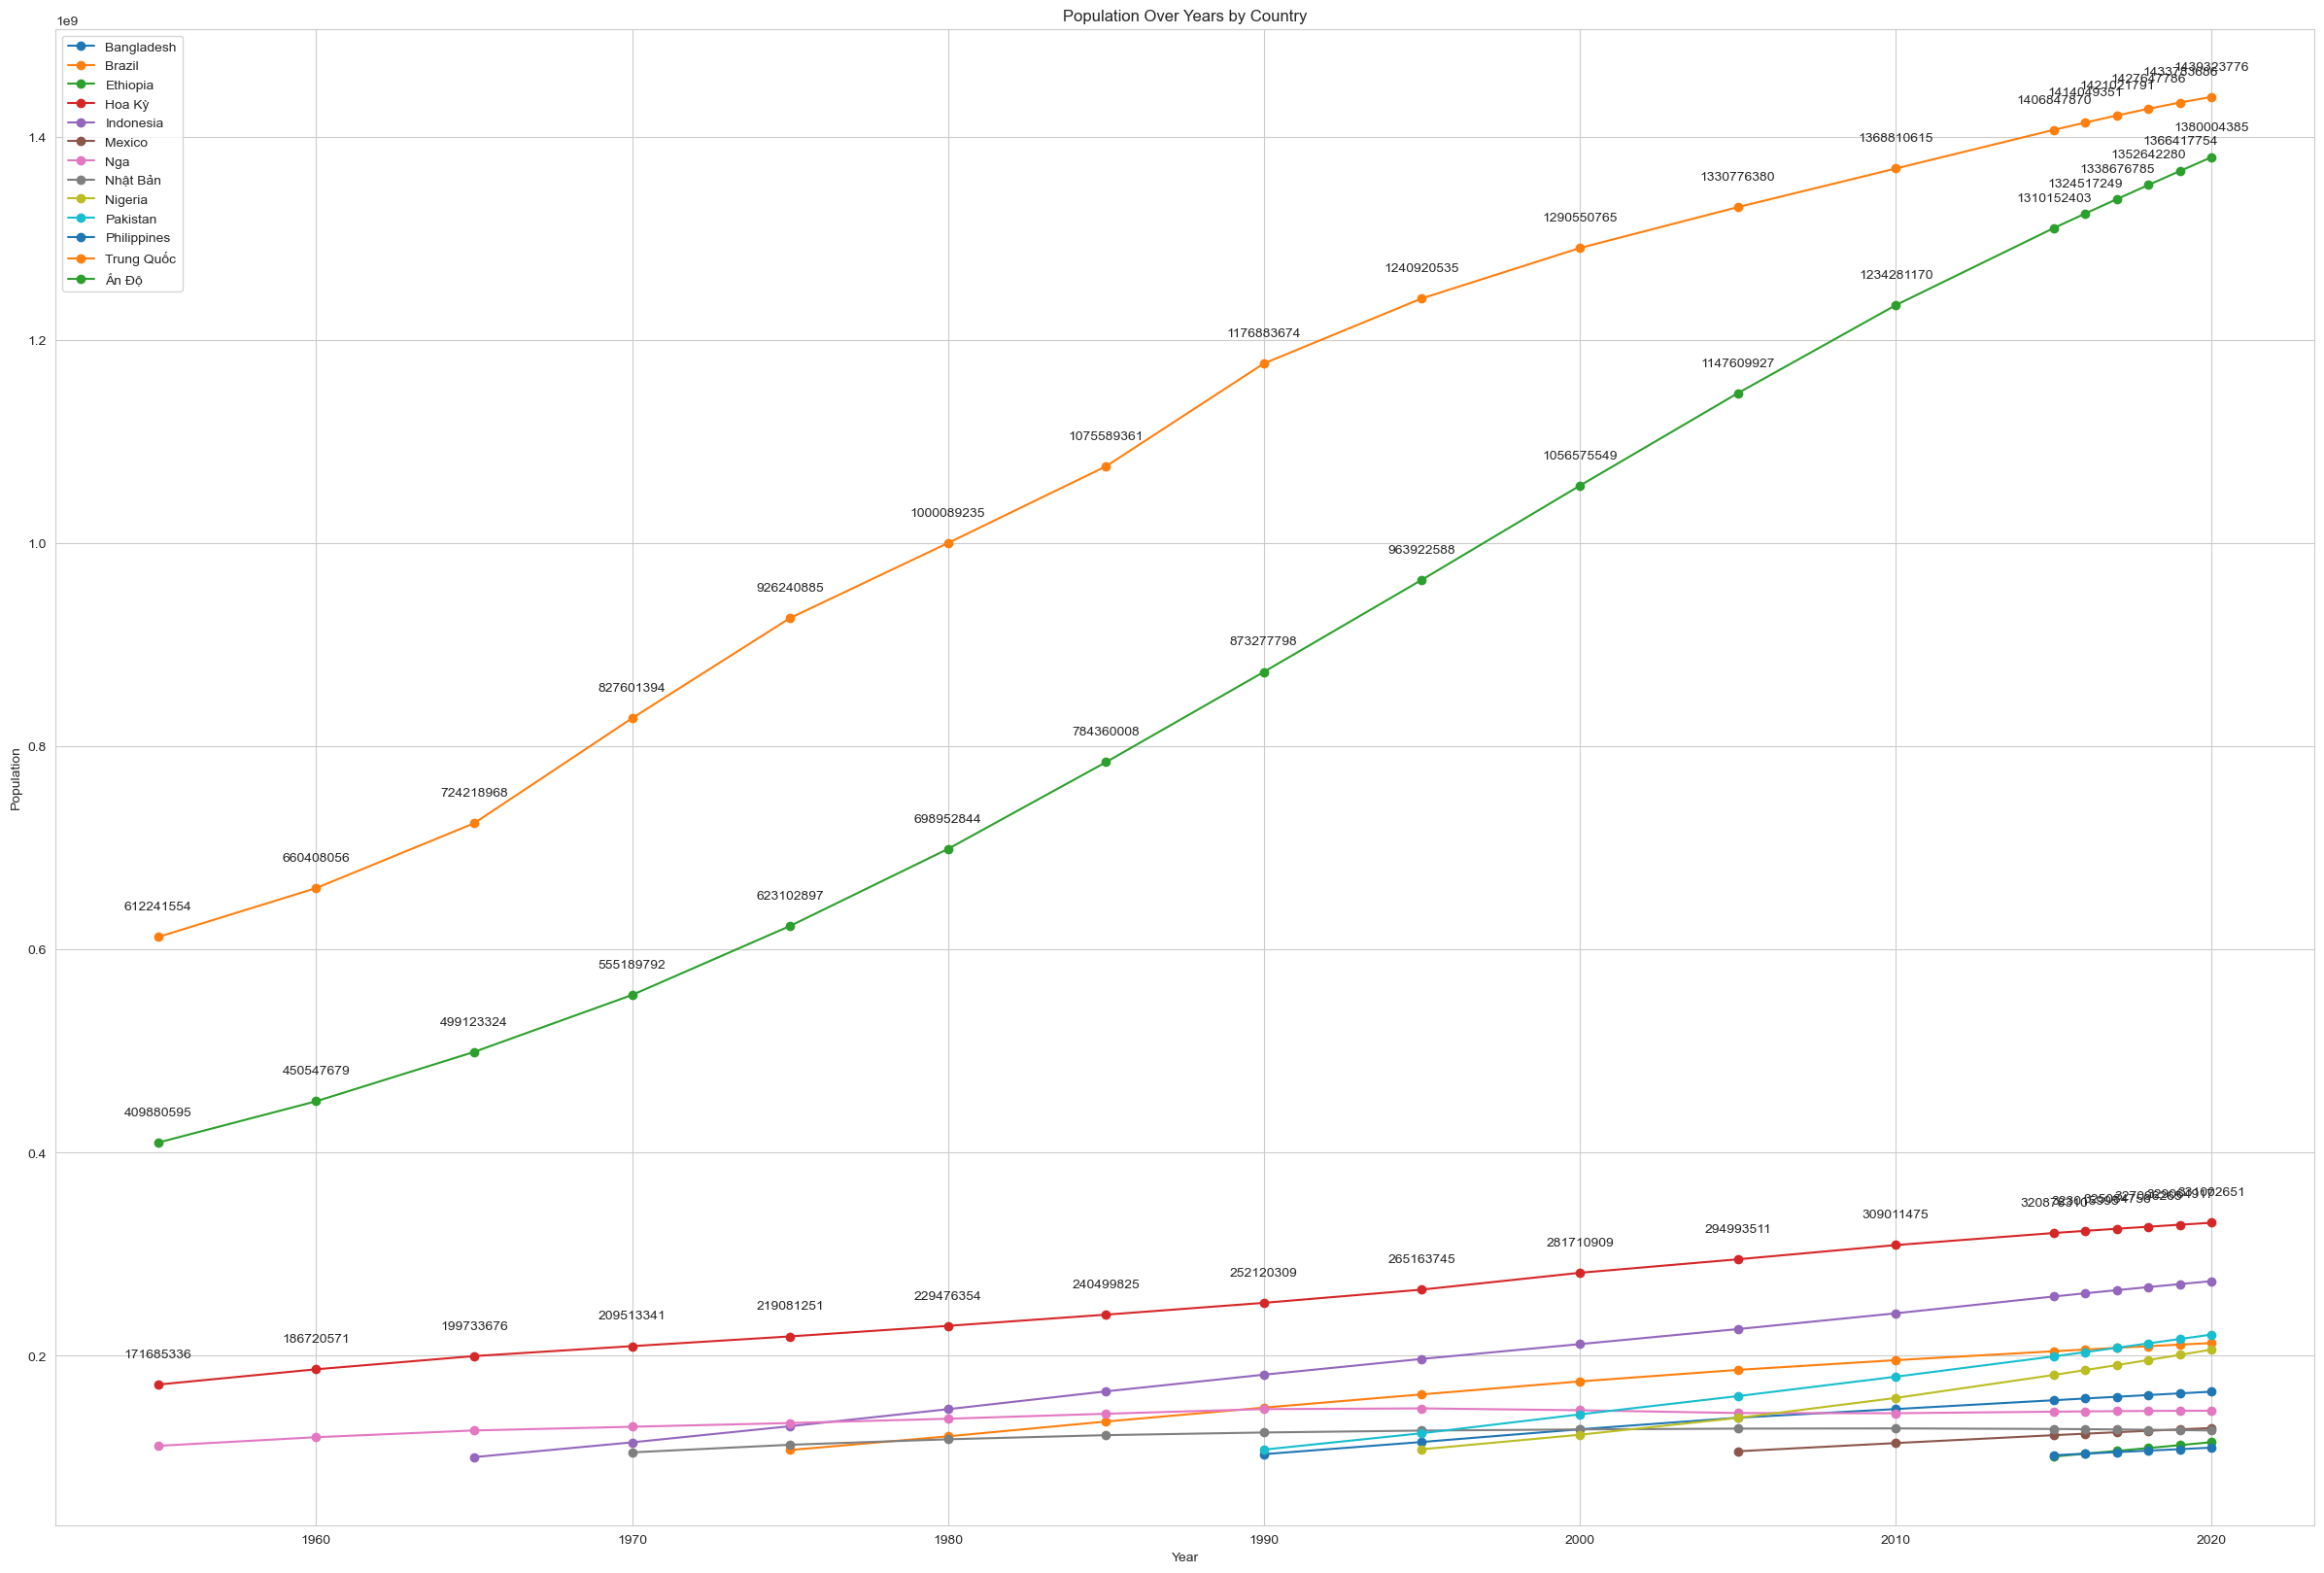

In [129]:
# Get the top countries > 100.000.000 population
top_countries = df[df['Dân số'] > 100000000]
top_countries['Quốc Gia'].unique()

# Determine the top 3 countries with the highest population
top_3_countries = top_countries.groupby('Quốc Gia')['Dân số'].max().nlargest(3).index

# Visualize the population over years by country
plt.figure(figsize=(30,20))
for label, df_group in top_countries.groupby('Quốc Gia'):
    plt.plot(df_group['Năm'], df_group['Dân số'], label=label, marker='o')
    if label in top_3_countries:
        for x, y in zip(df_group['Năm'], df_group['Dân số']):
            plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,20), ha='center',fontsize=10)

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Years by Country')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


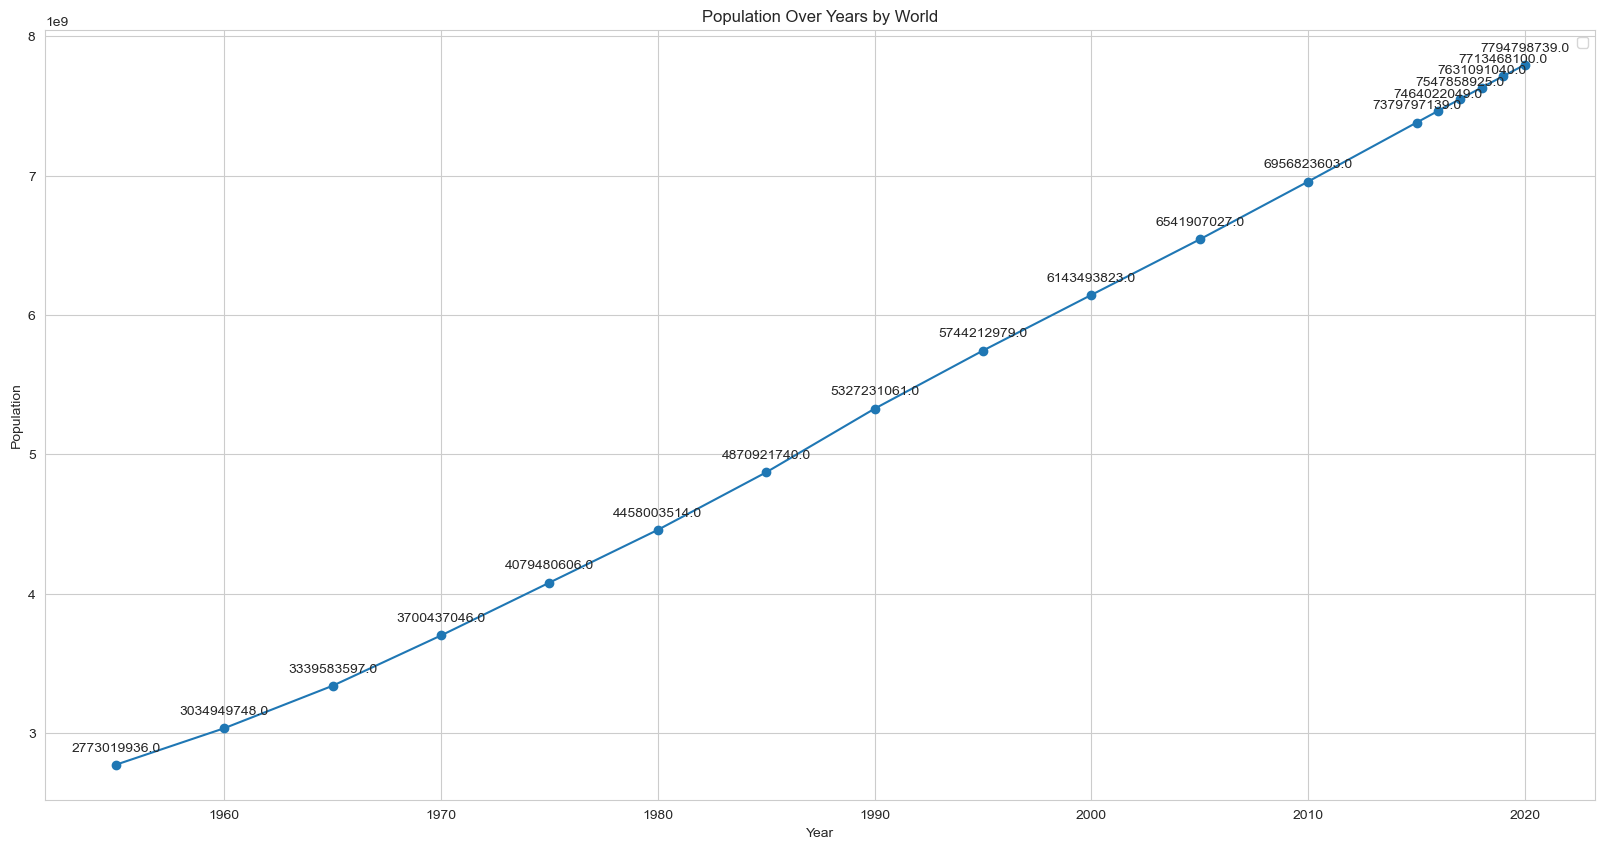

In [130]:
# Visualize World Population Changed by years
plt.figure(figsize=(20,10))
plt.plot(df_group['Năm'], df_group['Thế giới'], marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Over Years by World')

for x, y in zip(df_group['Năm'], df_group['Thế giới']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.show()

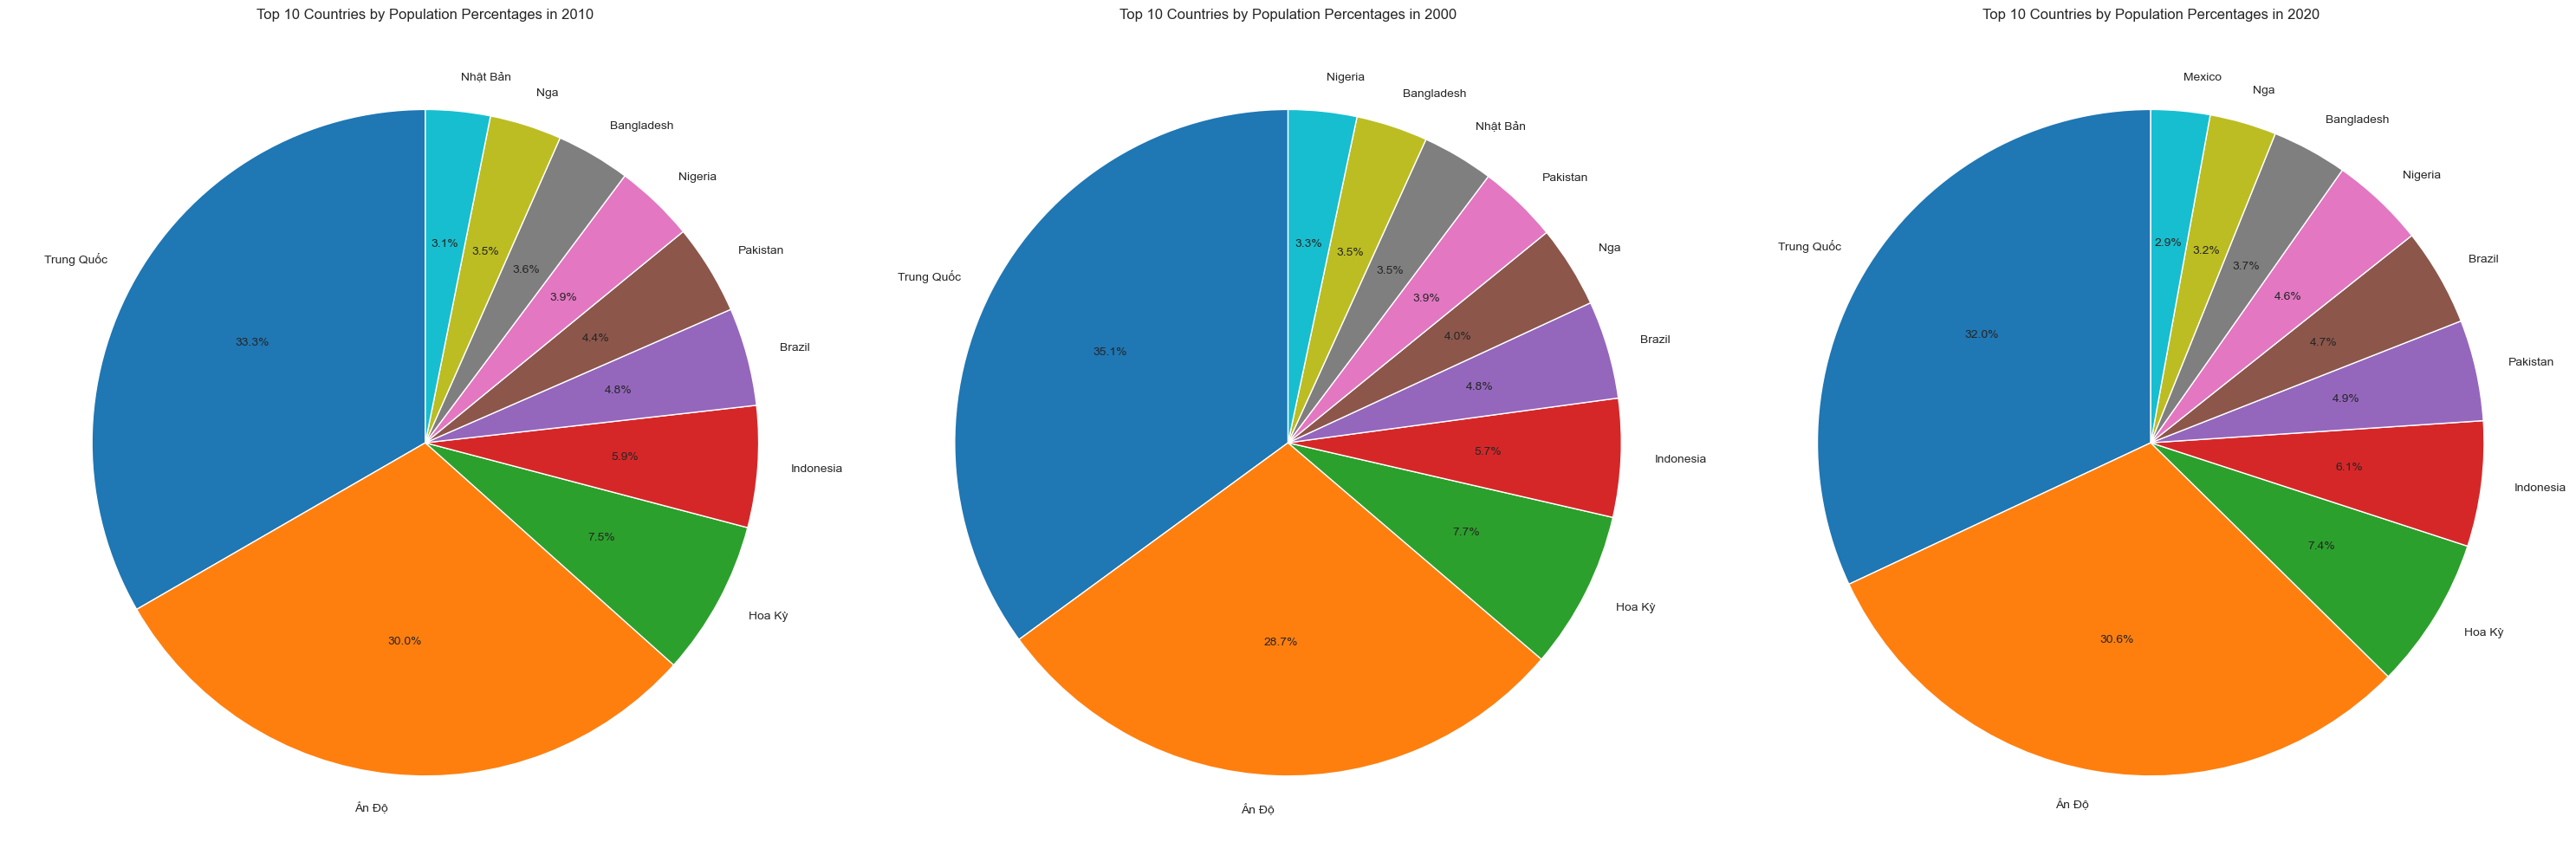

In [131]:
# Filter the DataFrame for the years 2010, 2000, and 2020
selected_years = [2010, 2000, 2020]
filtered_df = df[df['Năm'].isin(selected_years)]

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=1, ncols=len(selected_years), figsize=(30, 10))

# Loop through each selected year and create a pie chart for the top 10 countries
for i, year in enumerate(selected_years):
    # Filter the data for the current year
    year_data = filtered_df[filtered_df['Năm'] == year]
    # Sort to get top 10 Countries has the most %thế giới
    year_data = year_data.sort_values(by='% thế giới', ascending=False).head(10)
    axes[i].pie(year_data['% thế giới'], labels=year_data['Quốc Gia'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Top 10 Countries by Population Percentages in {year}')

plt.tight_layout()
plt.show()

### Details about Population: Unemployment, Urban citizen, Age, Density, GDP, Born Percentage

#### Data Processing and Analysis

##### Get top 3 Most Population Countries

In [132]:
top3_by_year = df.groupby('Năm').apply(lambda x: x.nlargest(3, 'Dân số')).reset_index(drop=True)

# Display the result
top3_by_year.head()

,Năm,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ,Quốc Gia
0,1955,612241554,2.00,11564456,-51205,13.8,84639825,22.08,2.773020e+09,1.0,22.2,6.11,65.0,Trung Quốc
1,1955,409880595,1.72,6711079,-21140,17.6,71958495,14.78,2.773020e+09,2.0,20.7,5.90,138.0,Ấn Độ
2,1955,171685336,1.57,2576188,173553,67.2,115375863,6.19,2.773020e+09,3.0,30.3,3.31,19.0,Hoa Kỳ
3,1960,660408056,1.53,9633300,-11900,16.1,106561743,21.76,3.034950e+09,1.0,21.3,5.48,70.0,Trung Quốc
4,1960,450547679,1.91,8133417,-30805,17.9,80565723,14.85,3.034950e+09,2.0,20.2,5.90,152.0,Ấn Độ


##### Merge Data of GDP and Population

In [133]:
# Create a mapping dictionary for country names
countries_mapping = {
    'China': 'Trung Quốc',
    'USA': 'Hoa Kỳ',
    'India': 'Ấn Độ'
}

# Map the 'Country' column in combined_dataset to Vietnamese
combined_df['Quốc Gia'] = combined_df['Country'].map(countries_mapping)
combined_df.rename(columns={'Year': 'Năm'}, inplace=True)
combined_df.drop(columns=['Country'], inplace=True)


In [134]:
combined_df['Năm'] = combined_df['Năm'].astype(int)
top3_by_year['Năm'] = top3_by_year['Năm'].astype(int)
# Merge combined_dataset with df on 'Quốc Gia' and 'Năm'
merged_dataset= pd.merge(combined_df, top3_by_year, on=['Quốc Gia', 'Năm'])
merged_dataset.head()

,Năm,GDP,Unemployment,Quốc Gia,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ
0,2020,1.468774e+13,5.00,Trung Quốc,1439323776,0.39,5540090,-348399,60.8,875075919,18.47,7.794799e+09,1.0,38.4,1.69,153.0
1,2019,1.427997e+13,4.56,Trung Quốc,1433783686,0.43,6135900,-348399,59.7,856409297,18.59,7.713468e+09,1.0,37.0,1.65,153.0
2,2018,1.389491e+13,4.31,Trung Quốc,1427647786,0.47,6625995,-348399,58.6,837022095,18.71,7.631091e+09,1.0,37.0,1.65,152.0
3,2017,1.231049e+13,4.47,Trung Quốc,1421021791,0.49,6972440,-348399,57.5,816957613,18.83,7.547859e+09,1.0,37.0,1.65,151.0
4,2016,1.123331e+13,4.56,Trung Quốc,1414049351,0.51,7201481,-348399,56.3,796289491,18.94,7.464022e+09,1.0,37.0,1.65,151.0


##### Processing

In [135]:
display(merged_dataset.describe(include='all'))
display(merged_dataset.info())
display(merged_dataset.isnull().sum())

,Năm,GDP,Unemployment,Quốc Gia,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ
count,42.000000,4.200000e+01,30.000000,42,4.200000e+01,42.000000,4.200000e+01,4.200000e+01,42.0,42.0,42.000000,4.200000e+01,42.000000,42.000000,42.000000,42.000000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,42.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Trung Quốc,NaN,NaN,NaN,NaN,60.8,875075919.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,2003.214286,6.870478e+12,5.821167,NaN,8.917912e+08,1.125000,9.561120e+06,1.493811e+05,NaN,NaN,13.994286,6.403794e+09,2.000000,30.223810,2.454286,179.857143
std,15.326584,7.201147e+12,1.875889,NaN,4.739081e+08,0.587746,6.386538e+06,6.275284e+05,NaN,NaN,6.948046,1.270689e+09,0.826394,6.396295,1.032681,152.862057
min,1975.000000,9.847280e+10,3.000000,NaN,2.190813e+08,0.390000,1.913582e+06,-5.326870e+05,NaN,NaN,4.250000,4.079481e+09,1.000000,19.700000,1.610000,24.000000
25%,1990.000000,7.559590e+11,4.482500,NaN,3.255876e+08,0.625000,2.620645e+06,-3.483990e+05,NaN,NaN,4.782500,5.327231e+09,1.000000,24.950000,1.785000,36.000000
50%,2007.500000,2.769268e+12,5.040000,NaN,1.028332e+09,0.970000,7.826287e+06,-8.146500e+04,NaN,NaN,17.620000,6.749365e+09,2.000000,30.000000,2.030000,144.000000
75%,2017.000000,1.285702e+13,7.788000,NaN,1.336702e+09,1.470000,1.501744e+07,7.347550e+05,NaN,NaN,18.800000,7.547859e+09,3.000000,36.975000,2.677500,286.500000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Năm              42 non-null     int64  
 1   GDP              42 non-null     float64
 2   Unemployment     30 non-null     float64
 3   Quốc Gia         42 non-null     object 
 4   Dân số           42 non-null     int64  
 5   % thay đổi       42 non-null     float64
 6   Thay đổi         42 non-null     int64  
 7   Di cư            42 non-null     int64  
 8   % dân thành thị  42 non-null     object 
 9   Dân thành thị    42 non-null     object 
 10  % thế giới       42 non-null     float64
 11  Thế giới         42 non-null     float64
 12  Hạng             42 non-null     float64
 13  Tuổi trung bình  42 non-null     float64
 14  Tỷ lệ sinh       42 non-null     float64
 15  Mật độ           42 non-null     float64
dtypes: float64(9), int64(4), object(3)
memory usage: 5.4+ KB


None

Năm                 0
GDP                 0
Unemployment       12
Quốc Gia            0
Dân số              0
% thay đổi          0
Thay đổi            0
Di cư               0
% dân thành thị     0
Dân thành thị       0
% thế giới          0
Thế giới            0
Hạng                0
Tuổi trung bình     0
Tỷ lệ sinh          0
Mật độ              0
dtype: int64

In [136]:
merged_dataset.dropna(subset=['Unemployment'], inplace=True)
merged_dataset.sort_values(by='Năm')

,Năm,GDP,Unemployment,Quốc Gia,Dân số,% thay đổi,Thay đổi,Di cư,% dân thành thị,Dân thành thị,% thế giới,Thế giới,Hạng,Tuổi trung bình,Tỷ lệ sinh,Mật độ
37,1995,3.602819e+11,6.998,Ấn Độ,963922588,1.99,18128958,-110590,26.5,255558824,16.78,5.744213e+09,2.0,21.8,3.83,324.0
9,1995,7.344848e+11,3.000,Trung Quốc,1240920535,1.07,12807372,-155996,30.9,383901711,21.60,5.744213e+09,1.0,27.4,1.83,132.0
23,1995,7.639749e+12,5.650,Hoa Kỳ,265163745,1.01,2608687,892751,77.4,205240402,4.62,5.744213e+09,3.0,34.0,2.03,29.0
8,2000,1.211332e+12,3.260,Trung Quốc,1290550765,0.79,9926046,-76600,35.7,460377048,21.01,6.143494e+09,1.0,30.0,1.62,137.0
22,2000,1.025095e+13,3.990,Hoa Kỳ,281710909,1.22,3309433,1771991,79.1,222927913,4.59,6.143494e+09,3.0,35.2,2.00,31.0
36,2000,4.683949e+11,7.850,Ấn Độ,1056575549,1.85,18530592,-136514,27.6,291350282,17.20,6.143494e+09,2.0,22.7,3.48,355.0
35,2005,8.203816e+11,8.700,Ấn Độ,1147609927,1.67,18206876,-377797,29.1,334479406,17.54,6.541907e+09,2.0,23.8,3.14,386.0
7,2005,2.285961e+12,4.520,Trung Quốc,1330776380,0.62,8045123,-393116,42.2,561983323,20.34,6.541907e+09,1.0,32.6,1.61,142.0
21,2005,1.303920e+13,5.080,Hoa Kỳ,294993511,0.93,2656520,1066979,80,235892407,4.51,6.541907e+09,3.0,36.1,2.04,32.0
34,2010,1.675616e+12,8.300,Ấn Độ,1234281170,1.47,17334249,-531169,30.8,380744554,17.74,6.956824e+09,2.0,25.1,2.80,415.0


##### Age, Born Percentage and Urban Population


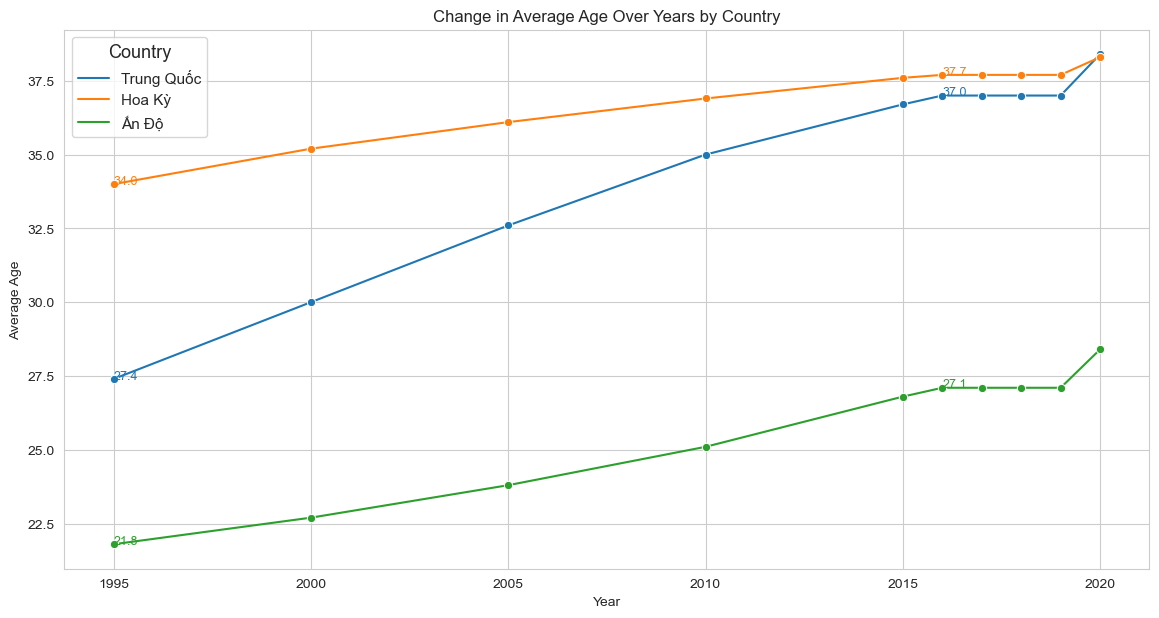

In [137]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a line plot to show the change of 'Tuổi trung bình' over the years by country
plt.figure(figsize=(14, 7))
lineplot = sns.lineplot(data=merged_dataset, x='Năm', y='Tuổi trung bình', hue='Quốc Gia', marker='o')

plt.title('Change in Average Age Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Average Age')
plt.legend(title='Country', title_fontsize='13', fontsize='11')
plt.grid(True)

# Adding data labels
for line in lineplot.lines:
    x_data = line.get_xdata()
    y_data = line.get_ydata()
    for i, (x, y) in enumerate(zip(x_data, y_data)):
        if i % 5 == 0:
            plt.text(x, y, f'{y:.1f}', color=line.get_color(), fontsize=9)

plt.show()

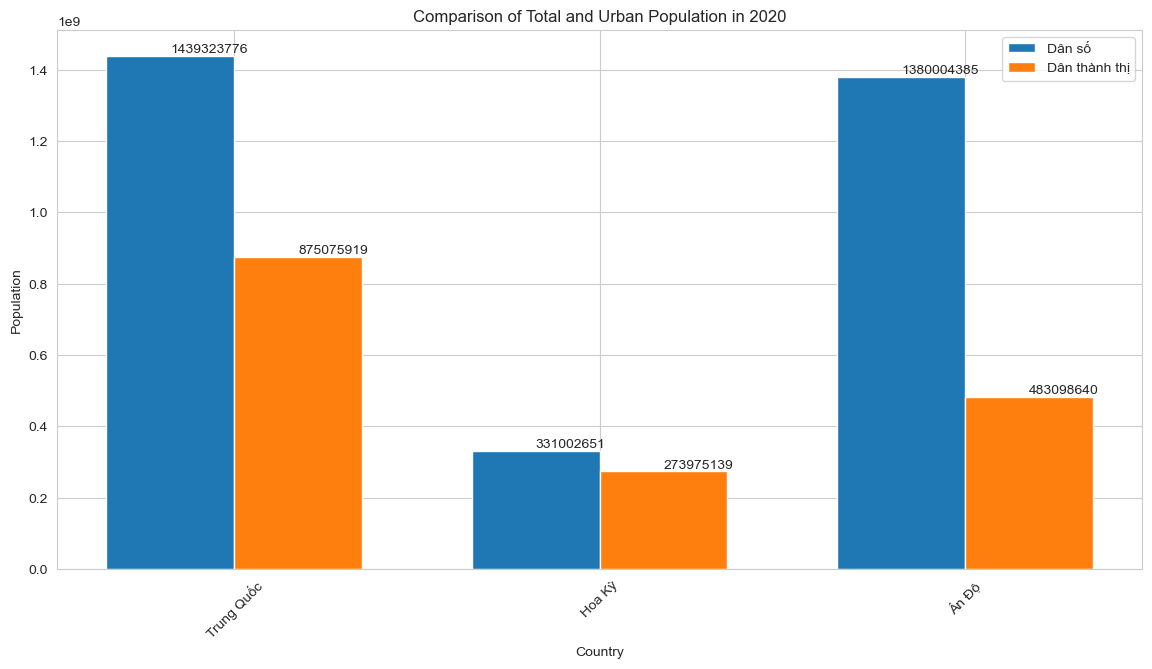

In [138]:
import numpy as np

data_2020 = merged_dataset[merged_dataset['Năm'] == 2020]

positions = np.arange(len(data_2020['Quốc Gia']))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))

# Plot bars for total population and urban population
bars1 = ax.bar(positions - width/2, data_2020['Dân số'], width, label='Dân số')
bars2 = ax.bar(positions + width/2, data_2020['Dân thành thị'], width, label='Dân thành thị')

# Adding data labels
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')

ax.set_xlabel('Country')
ax.set_ylabel('Population')
ax.set_title('Comparison of Total and Urban Population in 2020')
ax.set_xticks(positions)
ax.set_xticklabels(data_2020['Quốc Gia'])
ax.legend()

plt.xticks(rotation=45)
plt.show()

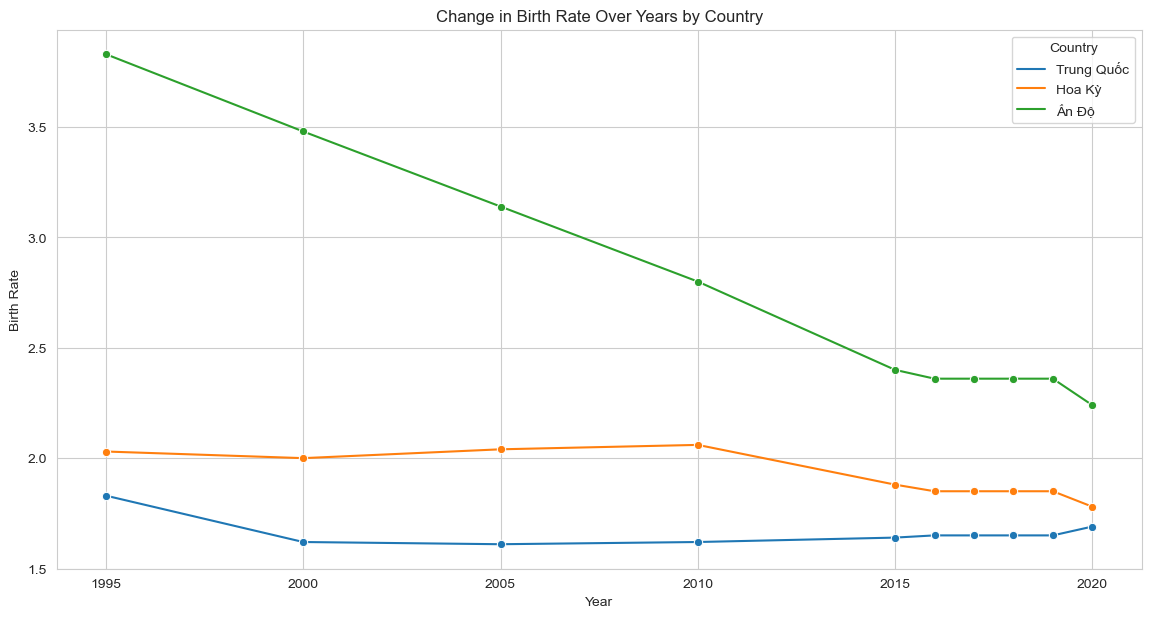

In [139]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_dataset, x='Năm', y='Tỷ lệ sinh', hue='Quốc Gia', marker='o')
plt.title('Change in Birth Rate Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.legend(title='Country')
plt.grid(True)
plt.show()

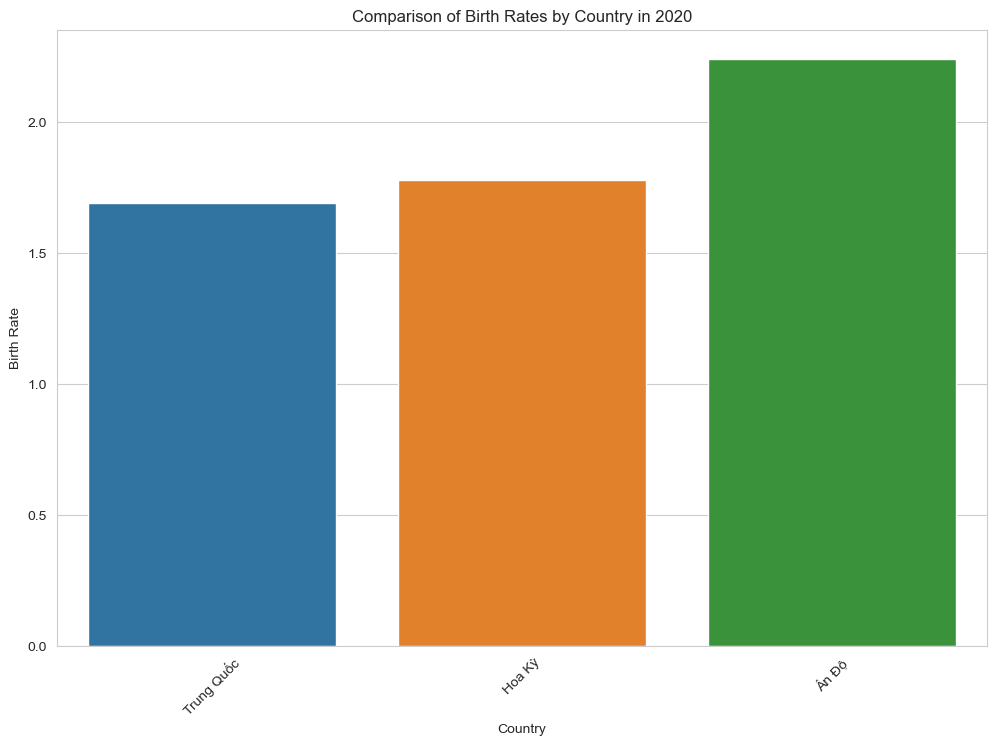

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

data_specific_year = merged_dataset[merged_dataset['Năm'] == 2020]

plt.figure(figsize=(12, 8))
sns.barplot(x='Quốc Gia', y='Tỷ lệ sinh', data=data_specific_year)
plt.title('Comparison of Birth Rates by Country in 2020')
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.xticks(rotation=45) 
plt.show()

##### GDP and Unemployment

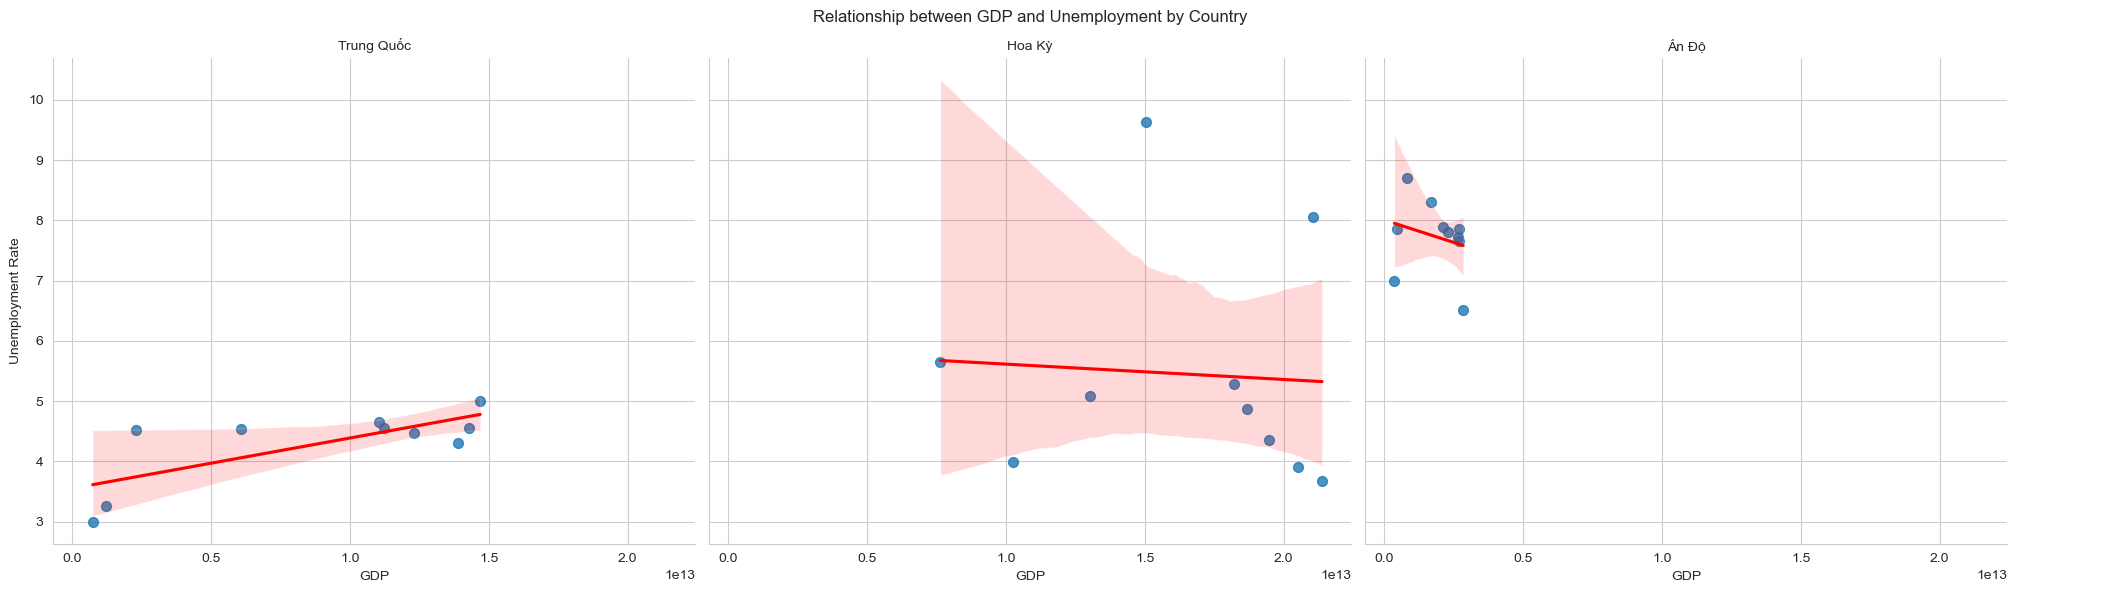

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the FacetGrid with adjusted spacing
g = sns.FacetGrid(merged_dataset, col='Quốc Gia', col_wrap=3, height=6, aspect=1.2)
g.map_dataframe(sns.regplot, x='GDP', y='Unemployment', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Adding titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("GDP", "Unemployment Rate")

# Adjusting the layout and adding a legend
g.add_legend()
g.fig.subplots_adjust(top=0.9, left=0.05, right=0.95) 
g.fig.suptitle('Relationship between GDP and Unemployment by Country')

plt.show()

In [142]:
import statsmodels.api as sm

# Prepare the data
X = sm.add_constant(merged_dataset['GDP'])
Y = merged_dataset['Unemployment']

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     4.104
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0524
Time:                        20:57:01   Log-Likelihood:                -58.881
No. Observations:                  30   AIC:                             121.8
Df Residuals:                      28   BIC:                             124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6436      0.520     12.767      0.0

### Statistic Analyst

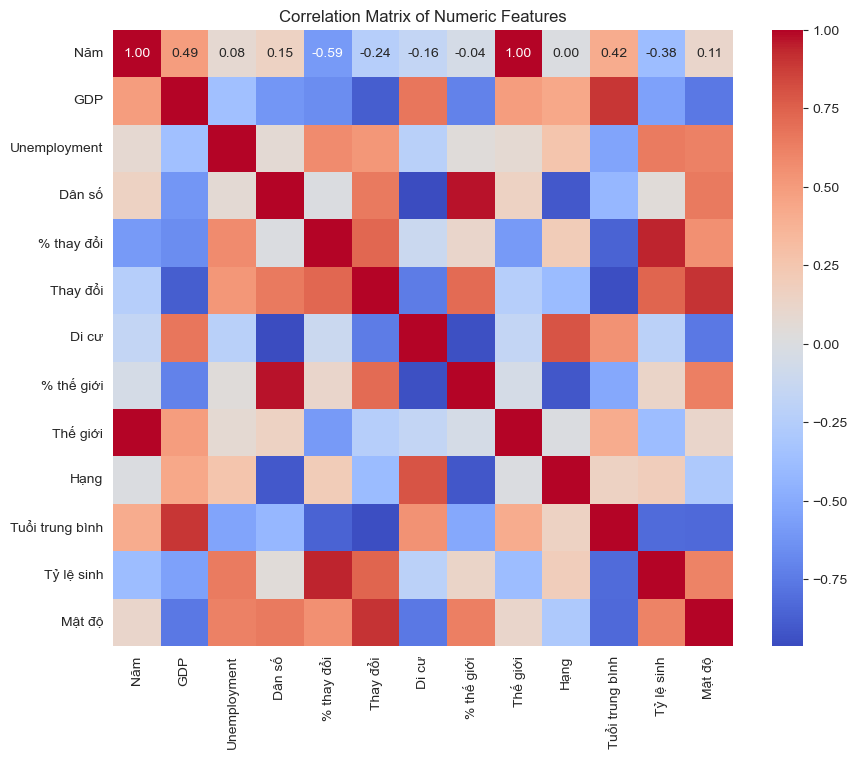

In [143]:
# Correlation Heatmap
corr = merged_dataset.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [144]:
import statsmodels.api as sm

X = merged_dataset.drop(columns=['Dân số', 'Năm'])
X = X.select_dtypes(include=[np.number])
y = merged_dataset['Dân số']

X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the model to see the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Dân số   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.112e+04
Date:                Sun, 26 May 2024   Prob (F-statistic):           5.56e-35
Time:                        20:57:01   Log-Likelihood:                -514.69
No. Observations:                  30   AIC:                             1049.
Df Residuals:                      20   BIC:                             1063.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.397e+07   6.48e+06     

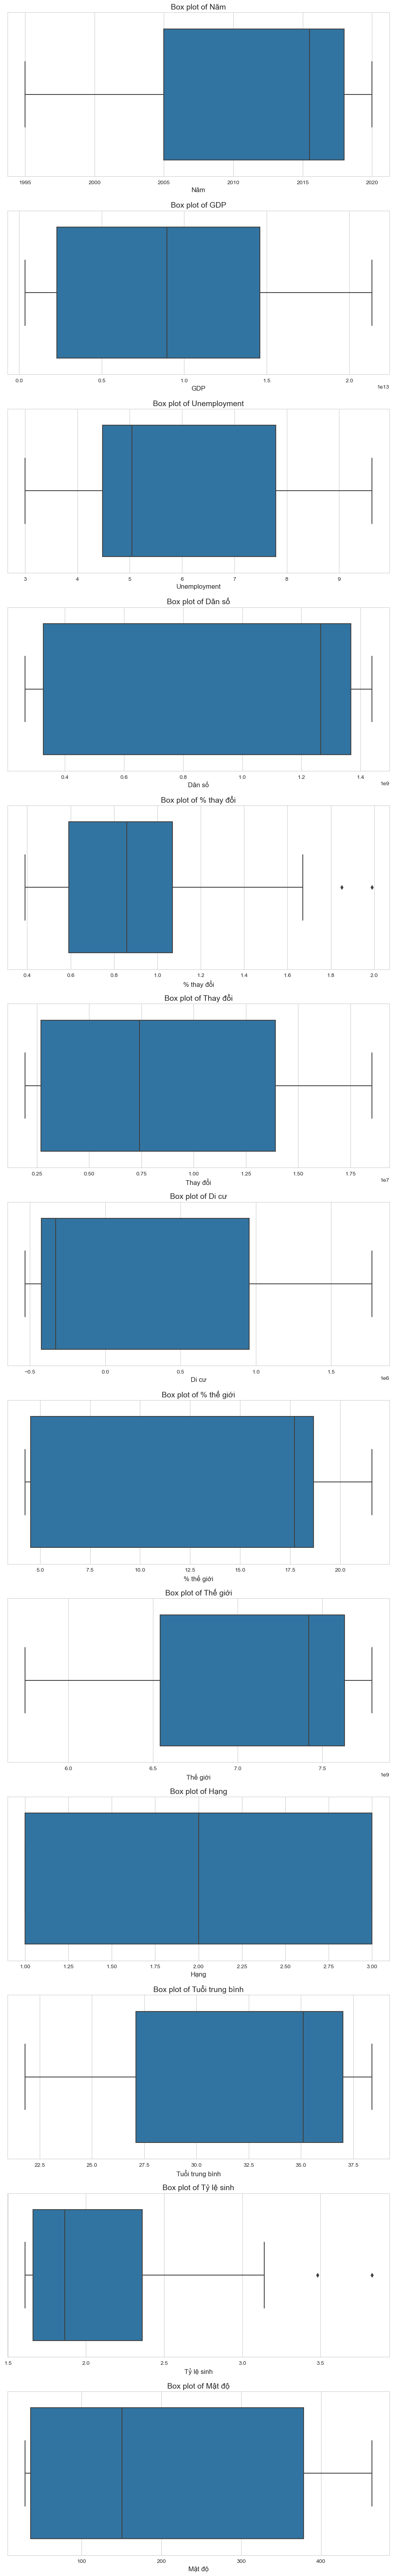

In [145]:
numeric_cols = merged_dataset.select_dtypes(include=[np.number]).columns

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(10, 5 * len(numeric_cols)))

# Check if there's only one numeric column, adjust axes to be iterable
if len(numeric_cols) == 1:
    axes = [axes]

# Loop through numeric columns and create a box plot for each
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=merged_dataset[col], ax=ax)
    ax.set_title(f'Box plot of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

# Preprocessing

In [146]:
china_df = merged_dataset[merged_dataset['Quốc Gia'] == r"Trung Quốc"]
usa_df = merged_dataset[merged_dataset['Quốc Gia'] == r"Hoa Kỳ"]
india_df = merged_dataset[merged_dataset['Quốc Gia'] == r"Ấn Độ"]

In [147]:
display(china_df.shape)
display(usa_df.shape)
display(india_df.shape)

(10, 16)

(10, 16)

(10, 16)

In [148]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
class DataPreprocessor:
    def __init__(self, dataframe, column_name):
        self.dataframe = dataframe
        self.column_name = column_name
        self.scaler = scaler

    def scale_data(self):
        self.dataframe.sort_values('Năm', inplace=True)
        self.dataframe['Scaled_' + self.column_name] = self.scaler.fit_transform(self.dataframe[[self.column_name]])
        return pd.DataFrame(self.dataframe['Scaled_' + self.column_name], columns=['Scaled_' + self.column_name])

    @staticmethod
    def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # Input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # Forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # Put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # Drop rows with NaN values
        if dropnan:
            agg.dropna(inplace=True)
        return agg

    def prepare_data(self, n_in, n_out):
        scaled_data = self.scale_data()
        reframed = self.series_to_supervised(scaled_data, n_in, n_out)
        values = reframed.values
        n_train_years = int(len(values) * 0.8)
        train = values[:n_train_years, :]
        test = values[n_train_years:, :]
        train_X, train_y = train[:, :-1], train[:, -1]
        test_X, test_y = test[:, :-1], test[:, -1]
        train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
        test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
        return train_X, train_y, test_X, test_y

# Modeling

## China

In [149]:
china_preprocessor = DataPreprocessor(china_df, 'Dân số')
train_X, train_y, test_X, test_y = china_preprocessor.prepare_data(4, 1)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))

# Second LSTM Layer
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM Layer
model.add(LSTM(50))
model.add(Dropout(0.2))

# Dense layer to output the predicted value
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mae')

# Fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/100


1/1 - 2s - 2s/step - loss: 0.8887 - val_loss: 0.9800
Epoch 2/100
1/1 - 0s - 26ms/step - loss: 0.8835 - val_loss: 0.9747
Epoch 3/100
1/1 - 0s - 24ms/step - loss: 0.8793 - val_loss: 0.9694
Epoch 4/100
1/1 - 0s - 25ms/step - loss: 0.8730 - val_loss: 0.9639
Epoch 5/100
1/1 - 0s - 24ms/step - loss: 0.8695 - val_loss: 0.9583
Epoch 6/100
1/1 - 0s - 24ms/step - loss: 0.8637 - val_loss: 0.9524
Epoch 7/100
1/1 - 0s - 25ms/step - loss: 0.8604 - val_loss: 0.9463
Epoch 8/100
1/1 - 0s - 24ms/step - loss: 0.8531 - val_loss: 0.9399
Epoch 9/100
1/1 - 0s - 24ms/step - loss: 0.8454 - val_loss: 0.9331
Epoch 10/100
1/1 - 0s - 24ms/step - loss: 0.8376 - val_loss: 0.9258
Epoch 11/100
1/1 - 0s - 25ms/step - loss: 0.8320 - val_loss: 0.9181
Epoch 12/100
1/1 - 0s - 25ms/step - loss: 0.8258 - val_loss: 0.9099
Epoch 13/100
1/1 - 0s - 26ms/step - loss: 0.8156 - val_loss: 0.9011
Epoch 14/100
1/1 - 0s - 26ms/step - loss: 0.8162 - val_loss: 0.8917
Epoch 15/100
1/1 - 0s - 24ms/step - loss: 0.8069 - val_loss: 0.8816
Epo

In [151]:
# Make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Test RMSE: 1576256.580


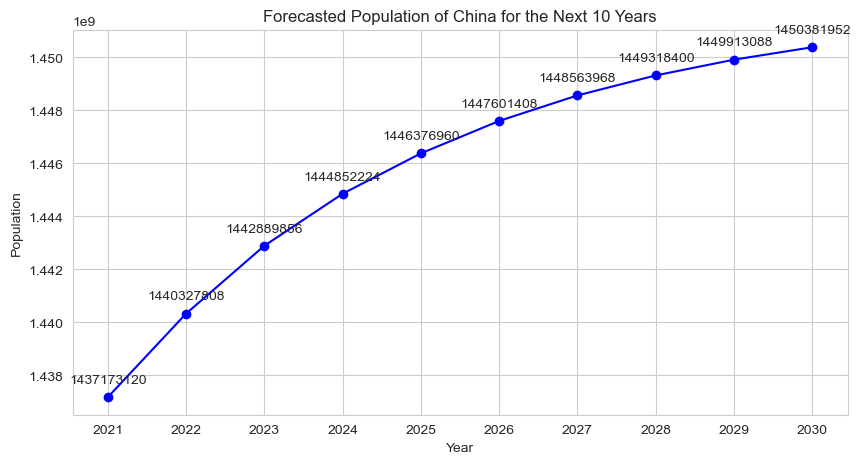

In [152]:
# Forecasting future population
future_steps = 10
x_input = test_X[-1].reshape((1, 1, 4)) 
predictions = []

for i in range(future_steps):
    # Predict the next step
    yhat = model.predict(x_input, verbose=0)
    predictions.append(yhat[0,0])
    x_input = np.append(x_input[:, :, 1:], yhat).reshape((1, 1, 4))
last_year = 2020
predicted_years = [last_year + i for i in range(1, future_steps + 1)]

predictions_array = np.array(predictions).reshape(-1, 1)  # Reshape for scaler
actual_predictions = scaler.inverse_transform(predictions_array)
actual_predictions = actual_predictions.flatten()  
# Plotting the forecasted population
plt.figure(figsize=(10, 5))
plt.plot(predicted_years, actual_predictions, marker='o', linestyle='-', color='b')
plt.title('Forecasted Population of China for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(predicted_years)
for i, txt in enumerate(actual_predictions):
    plt.annotate(f'{txt:.0f}', (predicted_years[i], actual_predictions[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

## India

In [153]:
india_preprocessor = DataPreprocessor(india_df, 'Dân số')
train_X_in, train_y_in, test_X_in, test_y_in = india_preprocessor.prepare_data(4, 1)

In [154]:
model_i = Sequential()

# First LSTM layer with Dropout
model_i.add(LSTM(100, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model_i.add(Dropout(0.2))

# Second LSTM Layer
model_i.add(LSTM(50, return_sequences=True))
model_i.add(Dropout(0.2))

# Third LSTM Layer
model_i.add(LSTM(50))
model_i.add(Dropout(0.2))

# Dense layer to output the predicted value
model_i.add(Dense(1))

# Compile the model
model_i.compile(optimizer='adam', loss='mae')

# Fit network
history_i = model_i.fit(train_X_in, train_y_in, epochs=100, batch_size=72, validation_data=(test_X_in, test_y_in), verbose=2, shuffle=False)


Epoch 1/100
1/1 - 2s - 2s/step - loss: 0.8831 - val_loss: 0.9791
Epoch 2/100
1/1 - 0s - 25ms/step - loss: 0.8787 - val_loss: 0.9744
Epoch 3/100
1/1 - 0s - 27ms/step - loss: 0.8739 - val_loss: 0.9697
Epoch 4/100
1/1 - 0s - 25ms/step - loss: 0.8706 - val_loss: 0.9649
Epoch 5/100
1/1 - 0s - 26ms/step - loss: 0.8660 - val_loss: 0.9600
Epoch 6/100
1/1 - 0s - 26ms/step - loss: 0.8623 - val_loss: 0.9549
Epoch 7/100
1/1 - 0s - 23ms/step - loss: 0.8563 - val_loss: 0.9497
Epoch 8/100
1/1 - 0s - 25ms/step - loss: 0.8519 - val_loss: 0.9441
Epoch 9/100
1/1 - 0s - 24ms/step - loss: 0.8447 - val_loss: 0.9383
Epoch 10/100
1/1 - 0s - 25ms/step - loss: 0.8409 - val_loss: 0.9321
Epoch 11/100
1/1 - 0s - 25ms/step - loss: 0.8378 - val_loss: 0.9256
Epoch 12/100
1/1 - 0s - 25ms/step - loss: 0.8299 - val_loss: 0.9187
Epoch 13/100
1/1 - 0s - 25ms/step - loss: 0.8249 - val_loss: 0.9113
Epoch 14/100
1/1 - 0s - 25ms/step - loss: 0.8156 - val_loss: 0.9034
Epoch 15/100
1/1 - 0s - 24ms/step - loss: 0.8143 - val_loss

In [155]:
# Make a prediction
yhat = model_i.predict(test_X_in)
test_X_in = test_X_in.reshape((test_X_in.shape[0], test_X_in.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X_in[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual
test_y_in = test_y_in.reshape((len(test_y_in), 1))
inv_y = np.concatenate((test_y_in, test_X_in[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculate RMSE
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Test RMSE: 38078460.401


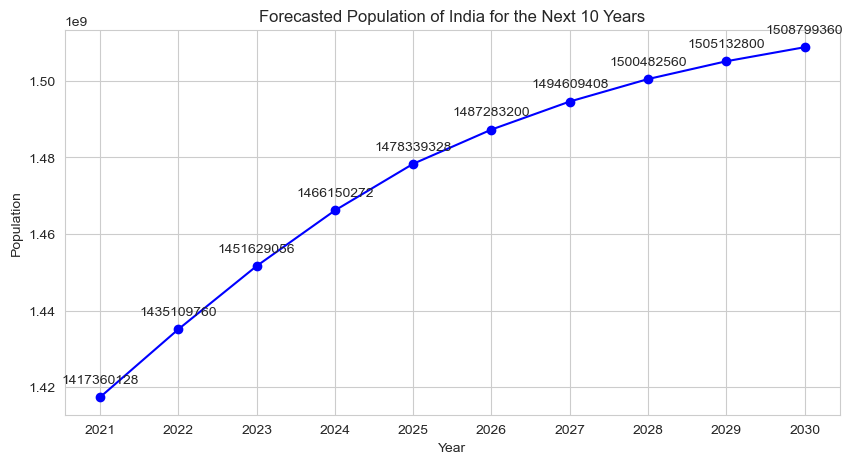

In [156]:
# Forecasting future population
future_steps = 10
x_input = test_X[-1].reshape((1, 1, 4)) 
predictions = []

for i in range(future_steps):
    # Predict the next step
    yhat = model_i.predict(x_input, verbose=0)
    predictions.append(yhat[0,0])
    x_input = np.append(x_input[:, :, 1:], yhat).reshape((1, 1, 4))

last_year = 2020
predicted_years = [last_year + i for i in range(1, future_steps + 1)]

predictions_array = np.array(predictions).reshape(-1, 1)  # Reshape for scaler
actual_predictions = scaler.inverse_transform(predictions_array)
actual_predictions = actual_predictions.flatten()  
# Plotting the forecasted population
plt.figure(figsize=(10, 5))
plt.plot(predicted_years, actual_predictions, marker='o', linestyle='-', color='b')
plt.title('Forecasted Population of India for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(predicted_years)
for i, txt in enumerate(actual_predictions):
    plt.annotate(f'{txt:.0f}', (predicted_years[i], actual_predictions[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

## USA

In [157]:
usa_preprocessor = DataPreprocessor(usa_df, 'Dân số')
train_X_us, train_y_us, test_X_us, test_y_us = usa_preprocessor.prepare_data(4, 1)

In [158]:
model_us = Sequential()

# First LSTM layer with Dropout
model_us.add(LSTM(100, return_sequences=True, input_shape=(train_X_us.shape[1], train_X_us.shape[2])))
model_us.add(Dropout(0.2))

# Second LSTM Layer
model_us.add(LSTM(50, return_sequences=True))
model_us.add(Dropout(0.2))

# Third LSTM Layer
model_us.add(LSTM(50))
model_us.add(Dropout(0.2))

# Dense layer to output the predicted value
model_us.add(Dense(1))

# Compile the model
model_us.compile(optimizer='adam', loss='mae')

# Fit network
history_us = model_us.fit(train_X_us, train_y_us, epochs=100, batch_size=72, validation_data=(test_X_us, test_y_us), verbose=2, shuffle=False)

Epoch 1/100
1/1 - 2s - 2s/step - loss: 0.8928 - val_loss: 0.9796
Epoch 2/100
1/1 - 0s - 22ms/step - loss: 0.8887 - val_loss: 0.9744
Epoch 3/100
1/1 - 0s - 22ms/step - loss: 0.8840 - val_loss: 0.9691
Epoch 4/100
1/1 - 0s - 22ms/step - loss: 0.8799 - val_loss: 0.9637
Epoch 5/100
1/1 - 0s - 22ms/step - loss: 0.8727 - val_loss: 0.9581
Epoch 6/100
1/1 - 0s - 21ms/step - loss: 0.8721 - val_loss: 0.9524
Epoch 7/100
1/1 - 0s - 22ms/step - loss: 0.8639 - val_loss: 0.9463
Epoch 8/100
1/1 - 0s - 21ms/step - loss: 0.8592 - val_loss: 0.9400
Epoch 9/100
1/1 - 0s - 22ms/step - loss: 0.8519 - val_loss: 0.9333
Epoch 10/100
1/1 - 0s - 22ms/step - loss: 0.8485 - val_loss: 0.9262
Epoch 11/100
1/1 - 0s - 22ms/step - loss: 0.8425 - val_loss: 0.9187
Epoch 12/100
1/1 - 0s - 22ms/step - loss: 0.8328 - val_loss: 0.9107
Epoch 13/100
1/1 - 0s - 22ms/step - loss: 0.8269 - val_loss: 0.9022
Epoch 14/100
1/1 - 0s - 22ms/step - loss: 0.8186 - val_loss: 0.8930
Epoch 15/100
1/1 - 0s - 21ms/step - loss: 0.8143 - val_loss

In [159]:
# Make a prediction
yhat = model_us.predict(test_X_us)
test_X_us = test_X_us.reshape((test_X_us.shape[0], test_X_us.shape[2]))

# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X_us[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Invert scaling for actual
test_y_us = test_y_us.reshape((len(test_y_us), 1))
inv_y = np.concatenate((test_y_us, test_X_us[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Test RMSE: 7390421.881


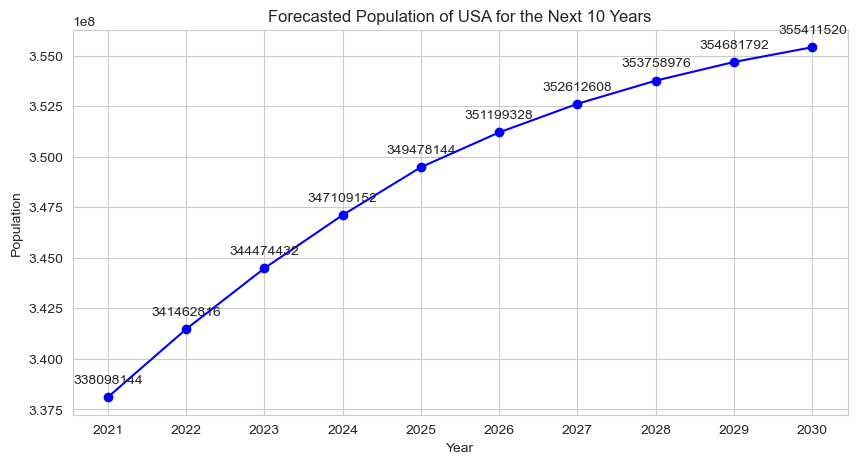

In [160]:
# Forecasting future population
future_steps = 10
x_input = test_X_us[-1].reshape((1, 1, 4)) 
predictions = []

for i in range(future_steps):
    # Predict the next step
    yhat = model_us.predict(x_input, verbose=0)
    predictions.append(yhat[0,0])
    x_input = np.append(x_input[:, :, 1:], yhat).reshape((1, 1, 4))

last_year = 2020
predicted_years = [last_year + i for i in range(1, future_steps + 1)]

predictions_array = np.array(predictions).reshape(-1, 1)  # Reshape for scaler
actual_predictions = scaler.inverse_transform(predictions_array)
actual_predictions = actual_predictions.flatten()  
# Plotting the forecasted population
plt.figure(figsize=(10, 5))
plt.plot(predicted_years, actual_predictions, marker='o', linestyle='-', color='b')
plt.title('Forecasted Population of USA for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.xticks(predicted_years)
for i, txt in enumerate(actual_predictions):
    plt.annotate(f'{txt:.0f}', (predicted_years[i], actual_predictions[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()